# DSI Instructor Task: Part 2

**In your notebook, move onto "Part 2" and log your responses accordingly. Please provide feedback for both of the sample student submissions provided below. Use the following guidelines to help structure your responses:**

**Code**

Feel free to comment on style, library usage, or other improvements.

**Methodology**

Feel free to comment on the student's data setup, modeling methodology, and model evaluation.
Conceptual Understanding

Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

# student sample solution 1

In [124]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression                  #===linearRegression is located within library linear_model 
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression


# Load data
d = pd.read_csv('/Users/xiaoyin/Downloads/GAdata.csv')   #=== inconsistent naming: d=data?


# Setup data for prediction
x1 = data.SalaryNormalized                              #=== see comments above; data and d? which one is your dataset
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()                              #===see first comment. Need first import linear_model

# Evaluate model
from sklearn.cross_validation import cross_val_score    #===this is fine, but convention is to import all packages at the beginning
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') 
print(scores.mean())



ImportError: cannot import name LinearRegression

## Code

Code style, library usage, and possible bugs are commented within above python code, indicated by "#==="



## Methodology

**data setup, modeling methodology, and model evaluation.
Conceptual Understanding**

This code is seriously flawed in the step of model building. This is due to the lack of enough understanding of the dataset and the goal of this study, and more specificly due to the missing of two important steps in data science--data cleaning and explorational analysis. Below I will elaborate on this.

A lot of times, we have to first clean the dataset for us to use. For example, we can see immediately that there are a lot missing values for the ContractType column. How do we deal with that? I will show shortly how to deal with this case below.

After we clean data, it is almost always necessary to do a brief explorational analysis, instead of jumping right onto model building process. The explorational analysis can give us a rough idea on what the data you are trying to modeling look like. And the insight one obtains from this process, has a direct impact on the quality of model one builds. For our specific case, we are trying to identify the relation between salary and job contract type. How about we first plot them and see what the relationship roughly looks like?

I will go over the detailed process below. 




** First, we need first load the data, use "data=..."(instead of "d")**




In [130]:
data = pd.read_csv('/Users/xiaoyin/Downloads/GAdata.csv')   #d=data?
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


** We see there are quite some missing values (NaN). Lets us check how many are there and whats the fraction**



In [131]:
data.isnull().sum()


Id                       0
Title                    1
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          6444
ContractTime          5263
Company               4049
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64

In [132]:
data.shape

(10000, 12)

** We see there are about 64% data on ContractType are missing! Since this is a feature we care a lot in our later model section, we need carefully handle this. One simple approach is just ignore these NaN records. This can be done as follows:**



In [133]:
data=data.dropna(subset=['ContractType'])
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,full_time,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com
154,44156175,Business Development/ Account Management/ IT s...,We are searching for a New Business Account Ma...,"Burton On Trent ,",Burton-On-Trent,full_time,NaN,Blues Point Ltd,Other/General Jobs,"21,000 + Uncapped Commission + Pool Cars",21000,zartis.com
177,46206762,Business Development Manager UK,Purpose of the Job: Reporting to the Sales Dir...,"South East England ,",South East England,full_time,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
178,46206763,National Key Account Manager UK,Purpose of the Job: As a Key Account Manager y...,"South East England ,",South East England,full_time,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
182,46626508,Support Worker Job Chepstow,Support Worker Job Chepstow We are a leading p...,"Chepstow, Gwent",UK,full_time,NaN,NaN,Healthcare & Nursing Jobs,6.43 per hour,12345,careworx.co.uk


** Clearly, we have kept only the records whose ContractType is not NaN, and the size of dataset becomes 3556*12**



In [134]:
data.shape

(3556, 12)

** One more thing we need pay attention to is: ContractType is a categorial variable. It can most conveniently dealt with by encoding it being a binary variable (0,1) **



In [135]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['ContractType'] = labelencoder.fit_transform(data['ContractType'])
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,0,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com
154,44156175,Business Development/ Account Management/ IT s...,We are searching for a New Business Account Ma...,"Burton On Trent ,",Burton-On-Trent,0,NaN,Blues Point Ltd,Other/General Jobs,"21,000 + Uncapped Commission + Pool Cars",21000,zartis.com
177,46206762,Business Development Manager UK,Purpose of the Job: Reporting to the Sales Dir...,"South East England ,",South East England,0,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
178,46206763,National Key Account Manager UK,Purpose of the Job: As a Key Account Manager y...,"South East England ,",South East England,0,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
182,46626508,Support Worker Job Chepstow,Support Worker Job Chepstow We are a leading p...,"Chepstow, Gwent",UK,0,NaN,NaN,Healthcare & Nursing Jobs,6.43 per hour,12345,careworx.co.uk


** And we see, the full_time is encoded as 0, and part_time as 1 **



## Explorational analysis


In [136]:
X = data.SalaryNormalized
y = data.ContractType
x1.shape
data.shape

(3556, 12)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


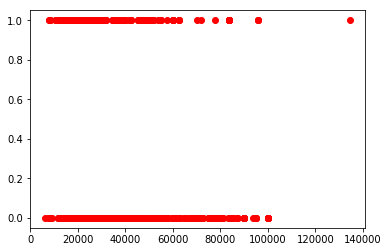

In [137]:
y = data.ContractType

X = data.SalaryNormalized

#reshape it for python to recogize single feature 
X=X.reshape(-1,1)

import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
#plt.axis([0, 6, 0, 20])
plt.show()

** From this we see, clearly this does not look like linear, and the linear model can be expected to perform poorly. **

**So what else can we read from this plot? instead of trying to predict the salary using Contract Type, We may want to use Contract Type to predict salary, since we observe that label 0 (full_time job) tends to have higher salary than label 1 (part_time job).**



In [119]:
from sklearn.cross_validation import cross_val_score
 


model = linear_model.LinearRegression()

scores = cross_val_score(model, X, y,scoring='r2')
scores        
scores.mean() 



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


-0.35245665357344413

** We just see it has negative score, which means very poor performance! (one can of course use other metrics,but r2 gives a very straightforward measure on how regression model performs (the larger the better, and negative means extremly poorly!)**



## So how should we improve on this?--Logistic Regression may be one way


In [107]:
from sklearn.linear_model import LogisticRegression

model = linear_model.LogisticRegression()

scores = cross_val_score(model, X, y)
scores.mean() 




0.83745803138720509

** It seems by using Logistic Regression, we achieve an accuracy of 83.7%, not bad! Now you see how a different simple model can drastically improve the model quality. The key here, however, is by doing explorational analysis first, and then realize to use Logistic regression (since this is binary classification) and why linear regression is a terrible choice.

# What's there for you to explore?

## Play around with the parameter tuning, like try use other metrics of scouring, differnt ways of cross-validation, and more importantly, use some other models (how about polynomials?) and compare their performance.

## Try play with the model building, i.e. try exchange X and y, but use models like Ridge and lasso.

## Try also split the dataset into a testing set and training set, and then compare the score obtained using cross-validation with the scoure obtained using new testing set.**

# student sample solution 2

In [127]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('/Users/xiaoyin/Downloads/GAdata.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

-11822.1402313


/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklea

## Code

Code style, library usage, and possible bugs are commented within above python code, indicated by "#==="


### Great job! It runs! You are awesome!

### Also you put all the libararies used at the begining, nice habit! 



## Methodology

**data setup, modeling methodology, and model evaluation.
Conceptual Understanding**

This code generally looks good. However, it is flawed on the modeling step, due to the lack of enough understanding of the dataset and the goal of this study, and more specificly due to the missing of two important steps in data science--data cleaning and explorational analysis. Below I will elaborate on this.

A lot of times, we have to first clean the dataset for us to use. For example, we can see immediately that there are a lot missing values for the ContractType column. How do we deal with that? I will show shortly how to deal with this case below.

After we clean data, it is almost always necessary to do a brief explorational analysis, instead of jumping right onto model building process. The explorational analysis can give us a rough idea on what the data you are trying to modeling look like. And the insight one obtains from this process, has a direct impact on the quality of model one builds. For our specific case, we are trying to identify the relation between salary and job contract type. How about we first plot them and see what the relationship roughly looks like?

I will go over the detailed process below. 




** First, we need first load the data, use "data=..."(instead of "d")**




In [111]:
data = pd.read_csv('/Users/xiaoyin/Downloads/GAdata.csv')   #d=data?
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


** We see there are quite some missing values (NaN). Lets us check how many are there and whats the fraction**



In [112]:
data.isnull().sum()


Id                       0
Title                    1
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          6444
ContractTime          5263
Company               4049
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64

In [113]:
data.shape

(10000, 12)

** We see there are about 64% data on ContractType are missing! Since this is a feature we care a lot in our later model section, we need carefully handle this. One simple approach is just ignore these NaN records. This can be done as follows:**



In [114]:
data=data.dropna(subset=['ContractType'])
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,full_time,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com
154,44156175,Business Development/ Account Management/ IT s...,We are searching for a New Business Account Ma...,"Burton On Trent ,",Burton-On-Trent,full_time,NaN,Blues Point Ltd,Other/General Jobs,"21,000 + Uncapped Commission + Pool Cars",21000,zartis.com
177,46206762,Business Development Manager UK,Purpose of the Job: Reporting to the Sales Dir...,"South East England ,",South East England,full_time,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
178,46206763,National Key Account Manager UK,Purpose of the Job: As a Key Account Manager y...,"South East England ,",South East England,full_time,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
182,46626508,Support Worker Job Chepstow,Support Worker Job Chepstow We are a leading p...,"Chepstow, Gwent",UK,full_time,NaN,NaN,Healthcare & Nursing Jobs,6.43 per hour,12345,careworx.co.uk


** Clearly, we have kept only the records whose ContractType is not NaN, and the size of dataset becomes 3556*12**



In [115]:
data.shape

(3556, 12)

** One more thing we need pay attention to is: ContractType is a categorial variable. It can most conveniently dealt with by encoding it being a binary variable (0,1) **



In [116]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['ContractType'] = labelencoder.fit_transform(data['ContractType'])
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,0,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com
154,44156175,Business Development/ Account Management/ IT s...,We are searching for a New Business Account Ma...,"Burton On Trent ,",Burton-On-Trent,0,NaN,Blues Point Ltd,Other/General Jobs,"21,000 + Uncapped Commission + Pool Cars",21000,zartis.com
177,46206762,Business Development Manager UK,Purpose of the Job: Reporting to the Sales Dir...,"South East England ,",South East England,0,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
178,46206763,National Key Account Manager UK,Purpose of the Job: As a Key Account Manager y...,"South East England ,",South East England,0,NaN,SourceDogg,Other/General Jobs,"40,000 - 50,000 plus package",45000,zartis.com
182,46626508,Support Worker Job Chepstow,Support Worker Job Chepstow We are a leading p...,"Chepstow, Gwent",UK,0,NaN,NaN,Healthcare & Nursing Jobs,6.43 per hour,12345,careworx.co.uk


** And we see, the full_time is encoded as 0, and part_time as 1 **



## Explorational analysis


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


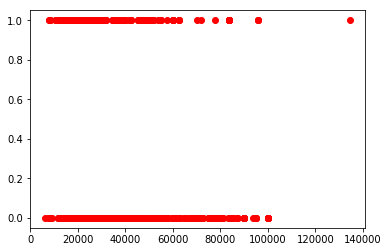

In [140]:
y = data.ContractType

X = data.SalaryNormalized

#reshape it for python to recogize single feature 
X=X.reshape(-1,1)

import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
#plt.axis([0, 6, 0, 20])
plt.show()

** From this we see, clearly this does not look like linear, and the linear model can be expected to perform poorly **



In [141]:
from sklearn.cross_validation import cross_val_score
 
model = linear_model.LinearRegression()

scores = cross_val_score(model, X, y,scoring='r2')
scores        
scores.mean() 



-0.35245665357344413

** We just see it has negative score, which means very poor performance! (one can of course use other metrics,but r2 gives a very straightforward measure on how regression model performs (the larger the better, and negative means extremly poorly!)**



## So how should we improve on this?--Logistic Regression may be one way


In [107]:
from sklearn.linear_model import LogisticRegression

model = linear_model.LogisticRegression()

scores = cross_val_score(model, X, y)
scores.mean() 




0.83745803138720509

** It seems by using Logistic Regression, we achieve an accuracy of 83.7%, not bad! Now you see how a different simple model can drastically improve the model quality. The key here, however, is by doing explorational analysis first, and then realize to use Logistic regression (since this is binary classification) and why linear regression is a terrible choice.**

# What's there for you to explore?

** Play around with the parameter tuning, like try use other metrics of scouring, differnt ways of cross-validation, and more importantly, use some other models (how about polynomials?) and compare their performance.**

** Try play with the model building, i.e. try exchange X and y, but use models like Ridge and lasso.**


**Try also split the dataset into a testing set and training set, and then compare the score obtained using cross-validation with the scoure obtained using new testing set.**

